# 1) Delivery_time -> Predict delivery time using sorting time 

## 1.Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from math import sqrt

## 2.Import Datasets

In [2]:
delivery_data = pd.read_csv('delivery_time.csv')
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## 3.Data Understanding

In [3]:
delivery_data.shape

(21, 2)

In [4]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


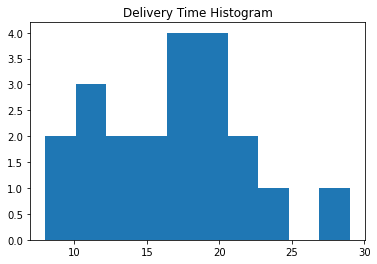

In [8]:
plt.title('Delivery Time Histogram')
plt.hist(x='Delivery Time',data=delivery_data)
plt.show()

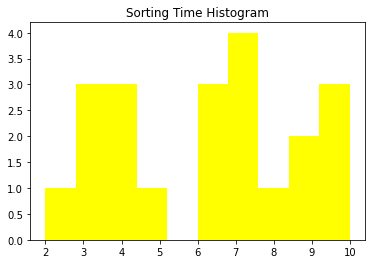

In [9]:
plt.title('Sorting Time Histogram')
plt.hist(x='Sorting Time',data=delivery_data,color='yellow')
plt.show()

In [10]:
delivery_data['Delivery Time'].kurtosis()

0.31795982942685397

In [11]:
delivery_data['Sorting Time'].kurtosis()

-1.14845514534878

In [12]:
delivery_data['Delivery Time'].skew()

0.3523900822831107

In [13]:
delivery_data['Sorting Time'].skew()

0.047115474210530174

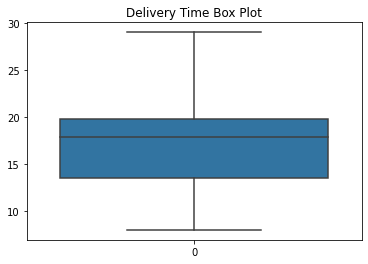

In [14]:
plt.title('Delivery Time Box Plot')
sns.boxplot(data=delivery_data['Delivery Time'])
plt.show()

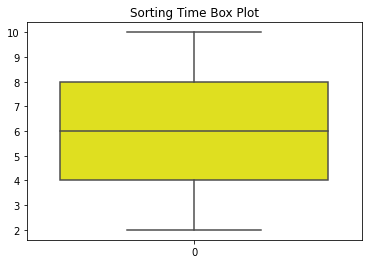

In [15]:
plt.title('Sorting Time Box Plot')
sns.boxplot(data=delivery_data['Sorting Time'],color='yellow')
plt.show()

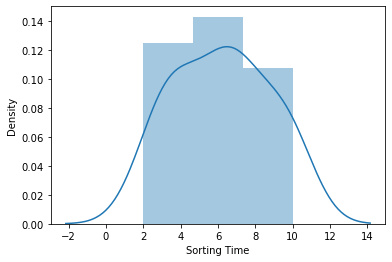

In [16]:
sns.distplot(delivery_data['Sorting Time'])
plt.show()

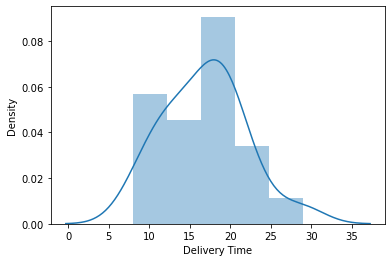

In [17]:
sns.distplot(delivery_data['Delivery Time'])
plt.show()

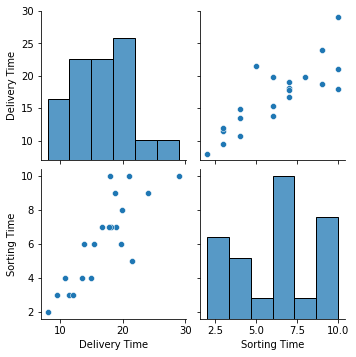

In [18]:
sns.pairplot(data=delivery_data)
plt.show()

#### We can able to find  that Positive Correlation

## 3[b] Checking the Assumptions

# To check the Linear association with two feautures

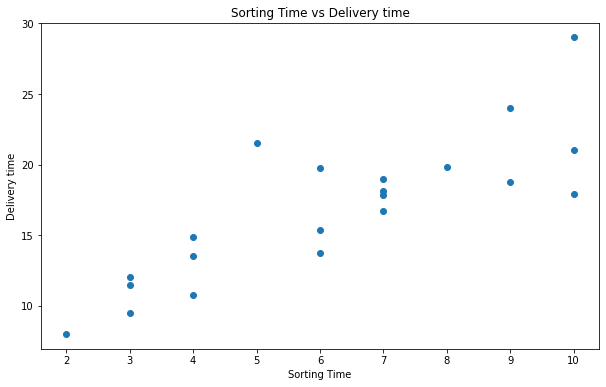

In [19]:
plt.figure(figsize=(10,6))
plt.title('Sorting Time vs Delivery time')
plt.xlabel('Sorting Time',)
plt.ylabel('Delivery time')
plt.scatter(x= 'Sorting Time',y= 'Delivery Time',data=delivery_data)

In [20]:
delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


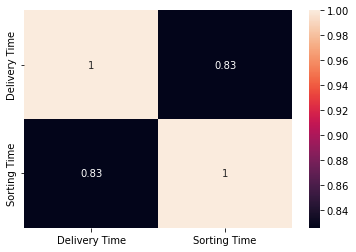

In [21]:
sns.heatmap(data=delivery_data.corr(),annot=True)
plt.show()

<AxesSubplot:title={'center':'Sorting Time vs Delivery time'}, xlabel='Sorting Time', ylabel='Delivery Time'>

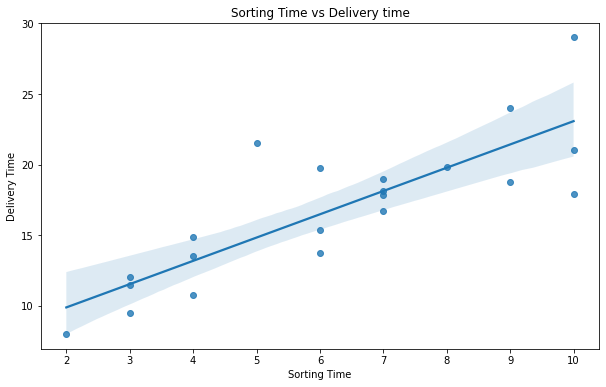

In [22]:
plt.figure(figsize=(10,6))
plt.title('Sorting Time vs Delivery time')
sns.regplot(x= 'Sorting Time',y= 'Delivery Time',data=delivery_data)

## 4.Data Preparation

In [23]:
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [24]:
delivery_data = delivery_data.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})
delivery_data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# MODEL-1 NO TRANSFORMATION

## 5.Model Building || Model Training

In [25]:
linear_model_1 = smf.ols(formula='Delivery_Time~Sorting_Time', data=delivery_data).fit() #OLS-Ordinary Least Square
linear_model_1

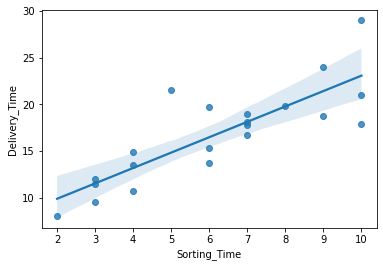

In [26]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=delivery_data)
plt.show()

## 6.Model Testing

In [27]:
#Finding Co-efficients
linear_model_1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [28]:
#Finding tvalues and Pvalues
linear_model_1.tvalues,linear_model_1.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [29]:
#Finding Rsquared values
linear_model_1.rsquared,linear_model_1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [30]:
linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        22:55:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above OLS model we can able find that R-square value is 0.682 which is lesser than 0.75 and also p-value also lesser than 0.05. Hence this is model is not GOOD to predict the Delivery time .

## 7.Model Prediction

### Manual Calculation

In [31]:
#If Sorting_Time = 25 , Delivery_Time = ?
#y=mx+c
DT = (1.649020*25)+6.582734
print('The Delivery time of 25 Sorting time is {}'.format(DT))

The Delivery time of 25 Sorting time is 47.808234


### Machine Calculation

In [32]:
pred_data = {'Sorting_Time':[10,12,18,25,5,8]}
pred_data

{'Sorting_Time': [10, 12, 18, 25, 5, 8]}

In [33]:
test_data = pd.DataFrame(pred_data)
test_data

,Sorting_Time
0,10
1,12
2,18
3,25
4,5
5,8


In [34]:
linear_model_1.predict(test_data)

0    23.072933
1    26.370973
2    36.265092
3    47.808231
4    14.827833
5    19.774893
dtype: float64

In [35]:
X=linear_model_1.predict(delivery_data['Sorting_Time'])
X

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [36]:
y=delivery_data['Delivery_Time']

In [37]:
mean_squared_error(y_true=y, y_pred=X)

7.793311548584063

In [38]:
sqrt(mean_squared_error(y_true=y, y_pred=X))

2.7916503270617654

# MODEL-2 LOG TRANSFORMATION OF Y

## Model Building and Model Training

In [39]:
linear_model_2 = smf.ols(formula='Delivery_Time~np.log(Sorting_Time)',data=delivery_data).fit()
linear_model_2

## Model Testing

In [40]:
#Finding Co-efficients
linear_model_2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [41]:
#Finding tvalues and Pvalues
linear_model_2.tvalues,linear_model_2.pvalues

(Intercept               0.472460
 np.log(Sorting_Time)    6.586789
 dtype: float64,
 Intercept               0.641980
 np.log(Sorting_Time)    0.000003
 dtype: float64)

In [42]:
#Finding Rsquared values
linear_model_2.rsquared,linear_model_2.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

In [43]:
linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        22:55:14   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL-3 LOG TRANSFORMATION OF X

## Model Building and Model Training

In [44]:
linear_model_3 = smf.ols(formula='np.log(Delivery_Time)~Sorting_Time',data=delivery_data).fit()
linear_model_3

## Model Testing

In [45]:
#Finding Co-efficients
linear_model_3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [46]:
#Finding tvalues and Pvalues
linear_model_3.tvalues,linear_model_3.pvalues

(Intercept       20.601357
 Sorting_Time     6.836088
 dtype: float64,
 Intercept       1.857343e-14
 Sorting_Time    1.592708e-06
 dtype: float64)

In [47]:
#Finding Rsquared values
linear_model_3.rsquared,linear_model_3.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [48]:
linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Wed, 14 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                           22:55:14   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL-4 LOG TRANSFORMATION OF X & Y

## Model Building and Model Training

In [49]:
linear_model_4 = smf.ols(formula='np.log(Delivery_Time)~np.log(Sorting_Time)',data=delivery_data).fit()
linear_model_4

## Model Testing

In [50]:
#Finding Co-efficients
linear_model_4.params

Intercept               1.741987
np.log(Sorting_Time)    0.597522
dtype: float64

In [51]:
#Finding tvalues and Pvalues
linear_model_4.tvalues,linear_model_4.pvalues

(Intercept               13.085552
 np.log(Sorting_Time)     8.024484
 dtype: float64,
 Intercept               5.921137e-11
 np.log(Sorting_Time)    1.601539e-07
 dtype: float64)

In [52]:
#Finding Rsquared values
linear_model_4.rsquared,linear_model_4.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [53]:
linear_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 14 Dec 2022   Prob (F-statistic):           1.60e-07
Time:                           22:55:14   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-5 Square Transformation

In [54]:
linear_model_5 = smf.ols(formula='Delivery_Time~np.sqrt(Sorting_Time)',data=delivery_data).fit()
linear_model_5

In [55]:
linear_model_5.params

Intercept               -2.518837
np.sqrt(Sorting_Time)    7.936591
dtype: float64

In [56]:
linear_model_5.tvalues,linear_model_3.pvalues

(Intercept               -0.840911
 np.sqrt(Sorting_Time)    6.592434
 dtype: float64,
 Intercept       1.857343e-14
 Sorting_Time    1.592708e-06
 dtype: float64)

In [57]:
linear_model_5.rsquared,linear_model_3.rsquared_adj

(0.6958062276308671, 0.6957346295351776)

In [58]:
linear_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           2.61e-06
Time:                        22:55:14   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model-6 Exponential Transformation

In [59]:
linear_model_6 = smf.ols(formula='Delivery_Time~np.exp(Sorting_Time)',data=delivery_data).fit()
linear_model_6

In [60]:
linear_model_6.params

Intercept               15.083578
np.exp(Sorting_Time)     0.000393
dtype: float64

In [61]:
linear_model_6.tvalues,linear_model_6.pvalues

(Intercept               14.406456
 np.exp(Sorting_Time)     3.277108
 dtype: float64,
 Intercept               1.117304e-11
 np.exp(Sorting_Time)    3.964511e-03
 dtype: float64)

In [62]:
linear_model_6.rsquared,linear_model_6.rsquared_adj

(0.361117702270909, 0.3274923181799042)

In [63]:
linear_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 14 Dec 2022   Prob (F-statistic):            0.00396
Time:                        22:55:14   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(Sorting_Time)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model-7 Reciprocal Transformation

In [64]:
linear_model_7 = smf.ols(formula='Delivery_Time~np.reciprocal(Sorting_Time)',data=delivery_data).fit()
linear_model_7

In [65]:
linear_model_7.params

Intercept                      16.790952
np.reciprocal(Sorting_Time)     0.000000
dtype: float64

In [66]:
linear_model_7.tvalues,linear_model_7.pvalues

(Intercept                      15.162032
 np.reciprocal(Sorting_Time)          NaN
 dtype: float64,
 Intercept                      1.973651e-12
 np.reciprocal(Sorting_Time)             NaN
 dtype: float64)

In [67]:
linear_model_7.rsquared,linear_model_7.rsquared_adj

(0.0, 0.0)

In [68]:
linear_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                nan
Time:                        22:55:15   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(Sorting_Time)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Conclusion 
## By Comparing R-Squared values of above models, Model 4 having the higher R-squared value of 0.772. Hence the Model-4 is a better model to predict Delivery Time


## 8.Model Deployment

In [99]:
from pickle import dump

In [100]:
dump(linear_model_4,open('linear_model_4.pkl','wb'))

In [101]:
from pickle import load

In [102]:
load(open('linear_model_4.pkl','rb'))